In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('Data_Regression/Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


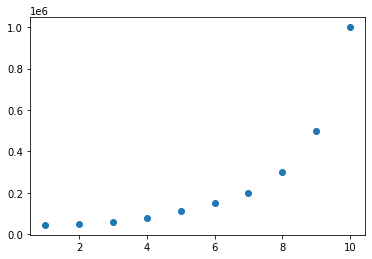

In [4]:
x = np.array(data.Level)
y = np.array(data.Salary)
plt.scatter(x,y)

In [5]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


In [25]:
def hstack(x, degre=1):
    X = np.hstack((x, np.ones((x.shape[0], 1))))
    if degre == 1:
        return X
    else:
        for i in range(2, degre+1):
            X = np.hstack((x**i, X))
        return X

#X = np.hstack((x**4,x**3,x**2,x,np.ones(x.shape)))
X = hstack(x, 4)
print(X.shape)

(10, 5)


In [7]:
theta = np.random.randn(5,1)
theta

array([[0.1947736 ],
       [1.58955098],
       [1.10513634],
       [0.87632686],
       [0.38601491]])

In [8]:
def model(X, theta):
    return X.dot(theta)

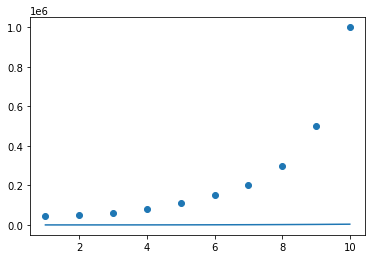

In [9]:
plt.scatter(x,y)
plt.plot(x, model(X, theta))

In [10]:
def fonction_cout(X, theta, y):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 

fonction_cout(X, theta, y)

70877440966.27896

In [11]:
def gradient(X, theta, y):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [12]:
def descente_gradient(X, theta, y, alpha, n_iterations):
    cost = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha*gradient(X, theta, y)
        cost[i] = fonction_cout(X, theta, y)
    return theta,cost

In [13]:
nouveau_theta = descente_gradient(X, theta, y, 0.0000001, 200)[0]

In [14]:
nouveau_theta

array([[91.36486033],
       [-2.72146607],
       [ 1.10900385],
       [ 1.54147904],
       [ 0.77174685]])

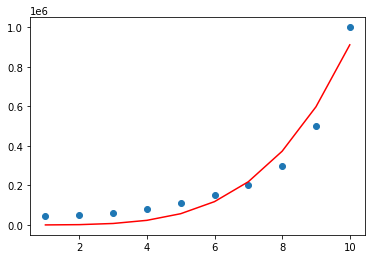

In [15]:
plt.scatter(x,y)
plt.plot(x, model(X, nouveau_theta), c='r')

In [16]:
def coef_determination(X, theta, y):
    u = ((y - model(X, nouveau_theta))**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [17]:
coef_determination(X, nouveau_theta, y)

0.953731512090629

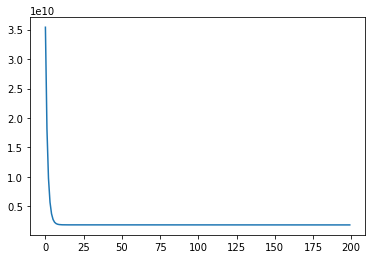

In [18]:
cost_history = np.array(descente_gradient(X, theta, y, 0.0000001, 200)[1])
plt.plot(range(len(cost_history)), cost_history)

## Avec Scikit Learn :

In [19]:
data.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
X = np.array(data.Level)
Y = np.array(data.Salary)

X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

print(X.shape)
print(Y.shape)

(10, 1)
(10, 1)


In [21]:
polynomial_features = PolynomialFeatures(degree = 5)
X_POLY = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_POLY, Y)

prediction = model.predict(X_POLY)

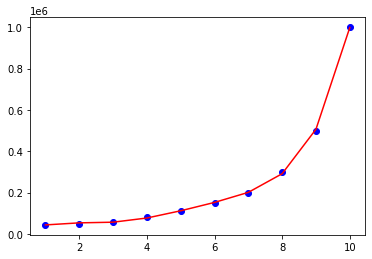

In [22]:
plt.scatter(X, Y, c='b')
plt.plot(X, prediction, c='r')

In [23]:
model.score(X_POLY, Y)

0.9997969027099755

In [24]:
erreur = mean_squared_error(Y, prediction)
print(erreur)

16382284.382283146
